In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import pandas

In [2]:
df_sms = pd.read_csv('C:/Users/micke/Desktop/spam.csv',encoding='latin-1')
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df_sms.tail()

,label,sms
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
#Number of observations in each label spam and ham
df_sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df_sms['length'] = df_sms['sms'].apply(len)

In [7]:
print (f"Maximum length of SMS is {max(df_sms['length'])}")

Maximum length of SMS is 910


In [8]:
print (f"Minimim length of SMS is {min(df_sms['length'])}")

Minimim length of SMS is 2


Text(0, 0.5, 'Frequency')

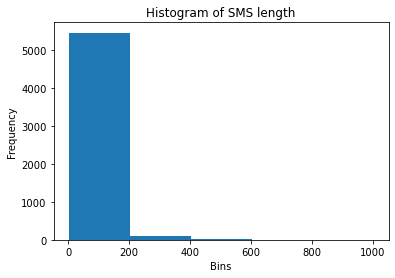

In [9]:
import matplotlib.pyplot as plt

data = list(df_sms['length'])
binsize = 200
plt.hist(data, bins=range(min(data), max(data) + binsize, binsize))

plt.title('Histogram of SMS length')
plt.xlabel("Bins")
plt.ylabel("Frequency")

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

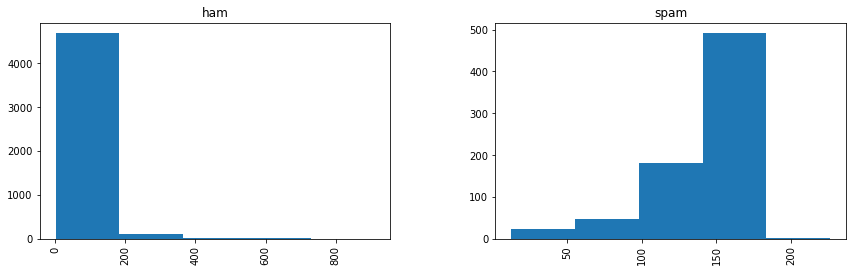

In [10]:
df_sms.hist(column='length', by='label', bins=5,figsize=(14,4))

In [11]:
#replace ham with 0 and spam with 1
df_sms.loc[:,'label'] = df_sms.label.map({'ham':0, 'spam':1})
print(df_sms.shape)
df_sms.head()

(5572, 3)


,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
# documents = ['Hello, how are you!',
#              'Win money, win from home.',
#              'Call me now.',
#              'Hello, Call hello you tomorrow?']

documents = ['Hi, how are you?', 
             'Win money, win from home. Call now.', 
             'Hi. Call you now or tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hi, how are you?', 'win money, win from home. call now.', 'hi. call you now or tomorrow?']


In [13]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hi how are you',
 'win money win from home call now',
 'hi call you now or tomorrow']

In [14]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hi', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home', 'call', 'now'],
 ['hi', 'call', 'you', 'now', 'or', 'tomorrow']]

In [15]:
frequency_list = []
import pprint
from collections import Counter

frequency_list = [Counter(d) for d in preprocessed_documents]
pprint.pprint(frequency_list)

[Counter({'hi': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1, 'call': 1, 'now': 1}),
 Counter({'hi': 1, 'call': 1, 'you': 1, 'now': 1, 'or': 1, 'tomorrow': 1})]


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [20]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hi',
 'home',
 'how',
 'money',
 'now',
 'or',
 'tomorrow',
 'win',
 'you']

In [21]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]], dtype=int64)

In [22]:
from sklearn.model_selection import train_test_split
# count_vector = CountVectorizer()
# norm_df_sms = count_vector.fit_transform(df_sms)
X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(norm_df_sms['sms'], 
#                                                     norm_df_sms['label'],test_size=0.20, 
#                                                     random_state=1)
# norm_df_sms[1,:]
#df_sms

In [23]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [24]:
print (training_data.shape)

(4457, 7777)


In [25]:
print (testing_data.shape)

(1115, 7777)


In [26]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [27]:
predictions = naive_bayes.predict(testing_data)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652
